In [ ]:
import os
import pandas as pd

In [ ]:
data_dir = '/content/drive/MyDrive/colon_image_sets'

filepaths = []
labels = []

for class_dir in os.listdir(data_dir):
    class_dir_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_dir_path):
        print(f'Processing class_dir: {class_dir_path}')

        for file in os.listdir(class_dir_path):
            filepath = os.path.join(class_dir_path, file)
            if os.path.isfile(filepath):
                filepaths.append(filepath)

                if class_dir == 'colon_aca':
                    labels.append('Colon Adenocarcinoma')
                elif class_dir == 'colon_n':
                    labels.append('Colon Benign Tissue')

fpaths = pd.Series(filepaths, name='filepaths')
labelss = pd.Series(labels, name='labels')


df = pd.concat([fpaths, labelss], axis=1)

print(df.head())

print(df.labels.value_counts())

Processing class_dir: /content/drive/MyDrive/colon_image_sets/colon_aca
Processing class_dir: /content/drive/MyDrive/colon_image_sets/colon_n
                                           filepaths                labels
0  /content/drive/MyDrive/colon_image_sets/colon_...  Colon Adenocarcinoma
1  /content/drive/MyDrive/colon_image_sets/colon_...  Colon Adenocarcinoma
2  /content/drive/MyDrive/colon_image_sets/colon_...  Colon Adenocarcinoma
3  /content/drive/MyDrive/colon_image_sets/colon_...  Colon Adenocarcinoma
4  /content/drive/MyDrive/colon_image_sets/colon_...  Colon Adenocarcinoma
labels
Colon Adenocarcinoma    5000
Colon Benign Tissue     5000
Name: count, dtype: int64


In [ ]:
df.labels.value_counts()

labels
Colon Adenocarcinoma    5000
Colon Benign Tissue     5000
Name: count, dtype: int64

In [ ]:
import os
import shutil
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

dataset_dir = '/content/drive/MyDrive/colon_image_sets'
classes = ['colon_n', 'colon_aca']

local_split_base_dir = '/content/dataset_split'
train_dir = os.path.join(local_split_base_dir, 'train')
val_dir = os.path.join(local_split_base_dir, 'validation')
test_dir = os.path.join(local_split_base_dir, 'test')


for split_dir in [train_dir, val_dir, test_dir]:
    for cls in classes:
        os.makedirs(os.path.join(split_dir, cls), exist_ok=True)

data_split = {'train': [], 'validation': [], 'test': []}

for cls in classes:
    cls_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(cls_dir)
    train_images, val_test_images = train_test_split(images, test_size=0.4, random_state=42)
    val_images, test_images = train_test_split(val_test_images, test_size=0.5, random_state=42)

    for image in train_images:
        shutil.copy(os.path.join(cls_dir, image), os.path.join(train_dir, cls, image))
        data_split['train'].append((image, cls))
    for image in val_images:
        shutil.copy(os.path.join(cls_dir, image), os.path.join(val_dir, cls, image))
        data_split['validation'].append((image, cls))
    for image in test_images:
        shutil.copy(os.path.join(cls_dir, image), os.path.join(test_dir, cls, image))
        data_split['test'].append((image, cls))

train_df = pd.DataFrame(data_split['train'], columns=['image', 'class'])
val_df = pd.DataFrame(data_split['validation'], columns=['image', 'class'])
test_df = pd.DataFrame(data_split['test'], columns=['image', 'class'])

print("Train Data Frame:")
print(train_df)
print("\nValidation Data Frame:")
print(val_df)
print("\nTest Data Frame:")
print(test_df)

print("Data split completed.")


drive_base_dir = '/content/drive/MyDrive/split_dataset'
drive_train_dir = os.path.join(drive_base_dir, 'train')
drive_val_dir = os.path.join(drive_base_dir, 'validation')
drive_test_dir = os.path.join(drive_base_dir, 'test')

shutil.copytree(train_dir, drive_train_dir)
shutil.copytree(val_dir, drive_val_dir)
shutil.copytree(test_dir, drive_test_dir)

print(f"Split dataset saved to Google Drive at {drive_base_dir}")


Train Data Frame:
                 image      class
0      colonn1528.jpeg    colon_n
1      colonn3773.jpeg    colon_n
2       colonn504.jpeg    colon_n
3       colonn760.jpeg    colon_n
4      colonn2622.jpeg    colon_n
...                ...        ...
5995  colonca1369.jpeg  colon_aca
5996   colonca524.jpeg  colon_aca
5997  colonca1979.jpeg  colon_aca
5998   colonca261.jpeg  colon_aca
5999   colonca864.jpeg  colon_aca

[6000 rows x 2 columns]

Validation Data Frame:
                 image      class
0      colonn2503.jpeg    colon_n
1      colonn3171.jpeg    colon_n
2      colonn4321.jpeg    colon_n
3      colonn2112.jpeg    colon_n
4      colonn1439.jpeg    colon_n
...                ...        ...
1995   colonca361.jpeg  colon_aca
1996  colonca1196.jpeg  colon_aca
1997  colonca2158.jpeg  colon_aca
1998  colonca3187.jpeg  colon_aca
1999  colonca2753.jpeg  colon_aca

[2000 rows x 2 columns]

Test Data Frame:
                 image      class
0      colonn4594.jpeg    colon_n
1     

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_images_from_dataframe(df, dataset_dir, classes, num_images=16):
    plt.figure(figsize=(15, 15))


    images_per_class = max(1, num_images // len(classes))

    selected_images = []
    for cls in classes:
        class_images = df[df['class'] == cls].sample(n=images_per_class, replace=True)
        selected_images.extend(class_images.values)


    selected_images = np.array(selected_images)
    np.random.shuffle(selected_images)

    for i in range(min(num_images, len(selected_images))):
        plt.subplot(4, 4, i + 1)
        img_path = os.path.join(dataset_dir, selected_images[i][1], selected_images[i][0])
        image = mpimg.imread(img_path)
        plt.imshow(image)
        class_name = selected_images[i][1]
        plt.title(class_name, color='black', fontsize=12)
        plt.axis('off')
    plt.show()

plot_images_from_dataframe(train_df, dataset_dir, classes)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


train_dir = '/content/drive/MyDrive/split_dataset/train'
validation_dir = '/content/drive/MyDrive/split_dataset/validation'
test_dir = '/content/drive/MyDrive/split_dataset/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:

from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall, AUC, MeanAbsoluteError, MeanSquaredError, RootMeanSquaredError

base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall'),
                       AUC(num_thresholds=200, curve='ROC', summation_method='interpolation', name='auc'),
                       MeanAbsoluteError(name='mean_absolute_error', dtype=None),
                       MeanSquaredError(name='mean_squared_error', dtype=None),
                       RootMeanSquaredError(name='root_mean_squared_error', dtype=None)])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('b_model.h5', save_best_only=True, monitor='val_loss')


43941136/43941136 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
188/188 [==============================] - ETA: 0s - loss: 0.7060 - accuracy: 0.5197 - precision: 0.5177 - recall: 0.5747 - auc: 0.5204 - mean_absolute_error: 0.4972 - mean_squared_error: 0.2549 - root_mean_squared_error: 0.5049

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/188 [==============================] - 239s 1s/step - loss: 0.7060 - accuracy: 0.5197 - precision: 0.5177 - recall: 0.5747 - auc: 0.5204 - mean_absolute_error: 0.4972 - mean_squared_error: 0.2549 - root_mean_squared_error: 0.5049 - val_loss: 0.6828 - val_accuracy: 0.6070 - val_precision: 0.5601 - val_recall: 0.9970 - val_auc: 0.8739 - val_mean_absolute_error: 0.4946 - val_mean_squared_error: 0.2448 - val_root_mean_squared_error: 0.4948
Epoch 2/50
188/188 [==============================] - 208s 1s/step - loss: 0.6883 - accuracy: 0.5387 - precision: 0.5377 - recall: 0.5513 - auc: 0.5550 - mean_absolute_error: 0.4944 - mean_squared_error: 0.2476 - root_mean_squared_error: 0.4976 - val_loss: 0.6792 - val_accuracy: 0.5000 - val_precision: 0.5000 - val_recall: 1.0000 - val_auc: 0.8503 - val_mean_absolute_error: 0.4901 - val_mean_squared_error: 0.2431 - val_root_mean_squared_error: 0.4931
Epoch 3/50
188/188 [==============================] - 205s 1s/step - loss: 0.6921 - accuracy: 0.5355 

In [ ]:
source_path = 'b_model.h5'
destination_path = '/content/drive/My Drive/b_model.h5'
shutil.copy(source_path, destination_path)

print(f'Model saved to {destination_path}')

Model saved to /content/drive/My Drive/b_model.h5


In [ ]:
print(f"Training loss : {history.history['loss'][-1]:0.2f}\n")
print(f"Training accuracy : {(history.history['accuracy'][-1]*100):0.2f}%\n")
print(f"Training precision : {history.history['precision'][-1]:0.2f}\n")
print(f"Training recall : {history.history['recall'][-1]:0.2f}\n")

Training loss : 0.60

Training accuracy : 67.68%

Training precision : 0.68

Training recall : 0.68



In [ ]:
print(f"Validation loss : {history.history['val_loss'][-1]:0.2f}\n")
print(f"Validation accuracy : {(history.history['val_accuracy'][-1]*100):0.2f}%\n")
print(f"Validation precision : {history.history['val_precision'][-1]:0.2f}\n")
print(f"Validation recall : {history.history['val_recall'][-1]:0.2f}\n")

Validation loss : 0.60

Validation accuracy : 64.25%

Validation precision : 0.58

Validation recall : 0.98



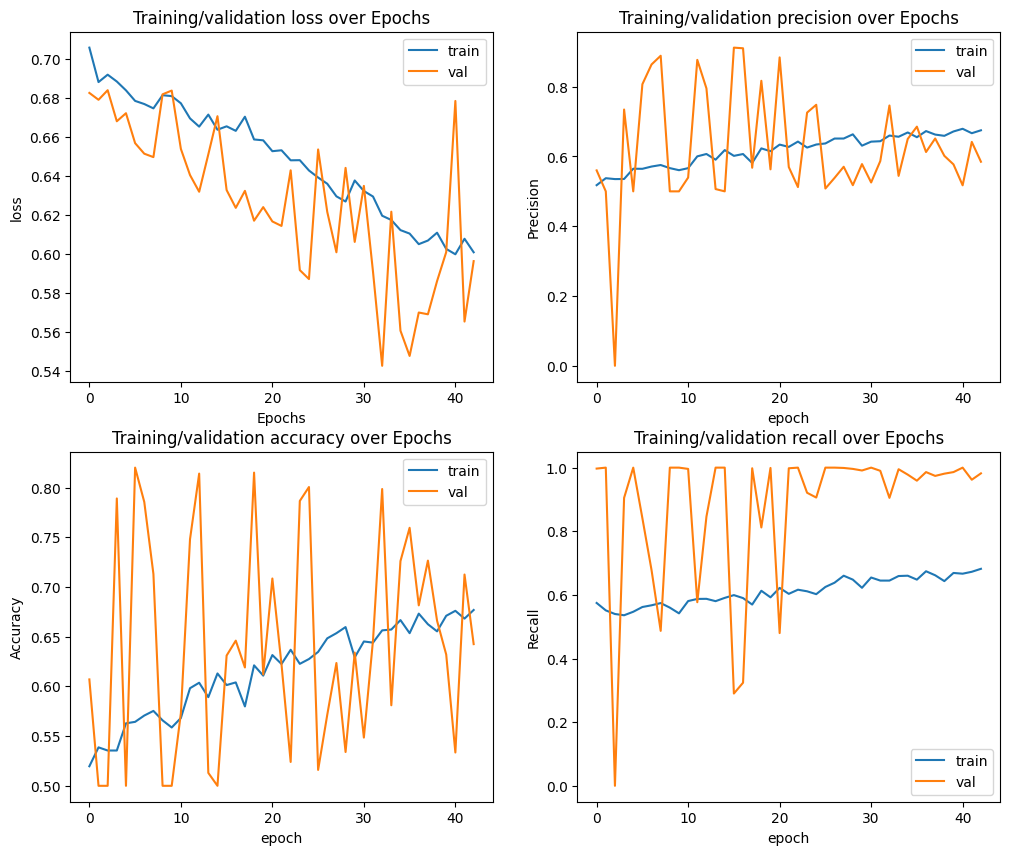

In [ ]:

figure , axis = plt.subplots(2,2,figsize=(12,10))


axis[0,0].plot(history.history['loss'] , label='train')
axis[0,0].plot(history.history['val_loss'] , label='val')
axis[0,0].set_title('Training/validation loss over Epochs')
axis[0,0].set_xlabel('Epochs')
axis[0,0].set_ylabel('loss')
axis[0,0].legend()


axis[1,0].plot(history.history['accuracy'], label='train')
axis[1,0].plot(history.history['val_accuracy'], label='val')
axis[1,0].set_title('Training/validation accuracy over Epochs')
axis[1,0].set_xlabel('epoch')
axis[1,0].set_ylabel('Accuracy')
axis[1,0].legend()


axis[0,1].plot(history.history['precision'], label='train')
axis[0,1].plot(history.history['val_precision'], label='val')
axis[0,1].set_title('Training/validation precision over Epochs')
axis[0,1].set_xlabel('epoch')
axis[0,1].set_ylabel('Precision')
axis[0,1].legend()


axis[1,1].plot(history.history['recall'], label='train')
axis[1,1].plot(history.history['val_recall'], label='val')
axis[1,1].set_title('Training/validation recall over Epochs')
axis[1,1].set_xlabel('epoch')
axis[1,1].set_ylabel('Recall')
axis[1,1].legend()

In [ ]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

test_score = model.evaluate(test_generator, steps= test_steps, verbose= 1)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

25/25 [==============================] - 9s 340ms/step - loss: 0.5361 - accuracy: 0.8087 - precision: 0.7630 - recall: 0.9039 - auc: 0.8921 - mean_absolute_error: 0.4017 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.4191
Test Loss:  0.5360559821128845
Test Accuracy:  0.8087499737739563


In [ ]:
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)


63/63 [==============================] - 21s 329ms/step


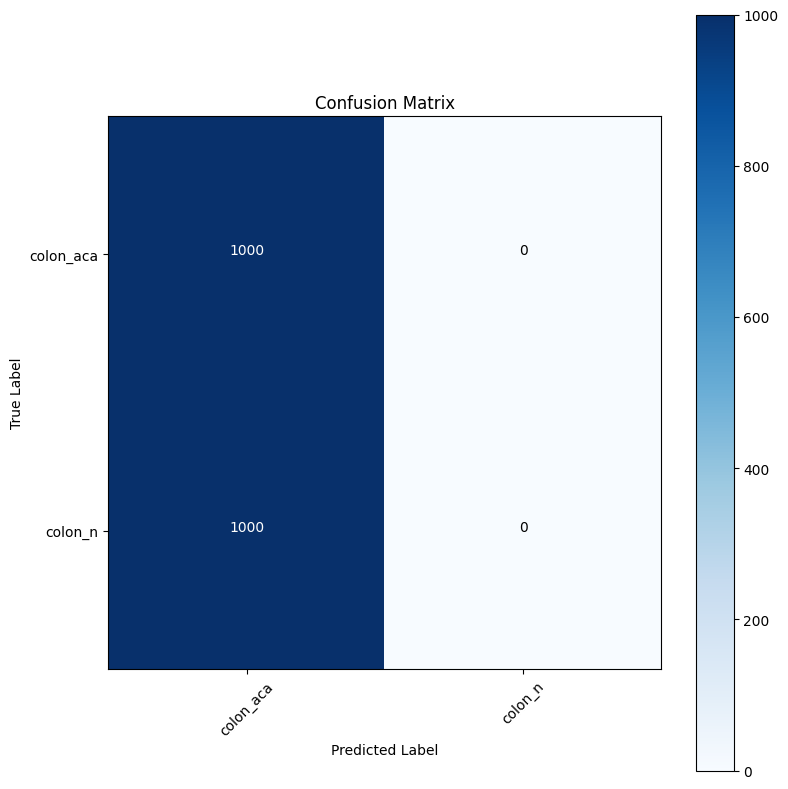

In [ ]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, classification_report


g_dict = test_generator.class_indices
classes = list(g_dict.keys())


cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize= (8, 8))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()